# MT and rDNA

In [ ]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")

In [ ]:
import pandas as pd
df = pd.read_csv('offtarget.WXS.csv')
df.head()

In [ ]:
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
metadata.head()

In [ ]:
data=pd.merge(df, metadata, on='ID')
data.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov", data=data)
#g=sns.stripplot(x="disease", y="cov", data=data, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='Off-target coverage')
g=sns.despine()
plt.xticks(rotation=90)
#plt.show(g)
plt.savefig("Off.target.coverage.png", bbox_inches='tight')

In [ ]:
#Run this reproduce.rDNA.py. Too long to run here

In [10]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_5S = pd.read_csv('5S.WXS.csv')
df_58S = pd.read_csv('58S.WXS.csv')
df_28S = pd.read_csv('28S.WXS.csv')
df_18S = pd.read_csv('18S.WXS.csv')

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_5S, metadata, on='ID')
data=pd.merge(data, df, on='ID')
data=pd.merge(data, df_58S, on='ID')
data=pd.merge(data, df_28S, on='ID')
data=pd.merge(data, df_18S, on='ID')


data['cov.5S.norm'] = data['cov.5S']/data['cov']
data['cov.58S.norm'] = data['cov.58S']/data['cov']
data['cov.28S.norm'] = data['cov.28S']/data['cov']
data['cov.18S.norm'] = data['cov.18S']/data['cov']


data.head()



,ID,cov.5S,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,patient_uuid,slides_0,cov,cov.58S,cov.28S,cov.18S,cov.5S.norm,cov.58S.norm,cov.28S.norm,cov.18S.norm
0,003860a34c9b244a5d8435b220ca5673,5.696549,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,5.390855,2834.899371,70.610746,130.710005,1.056706,525.871894,13.098245,24.246617
1,04dad306f9be80db39f4be578091aa11,16.363066,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,4.966536,946.503145,194.582090,261.747994,3.294664,190.576112,39.178632,52.702324
2,08886fe521e2ff176295468dc519d9f3,7.967727,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,3.162184,3307.685535,18.621891,157.719101,2.519691,1046.013017,5.888933,49.876638
3,09f52a751a3bd08f2fd4dcc61a046ed0,13.939041,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,52c35691-efca-42f5-a03e-02c9f872275c,NaN,4.683656,984.308176,200.056119,286.082397,2.976103,210.158105,42.713670,61.081007
4,0e66d92c70e71ca68bc7df03f140ac23,13.560287,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,3.325347,856.628931,165.016119,286.418941,4.077857,257.605910,49.623736,86.132057


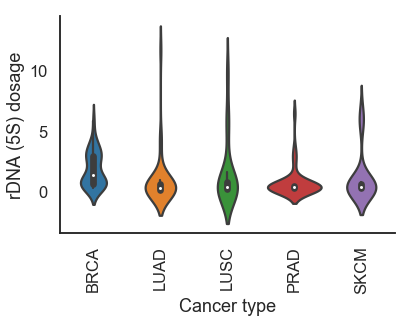

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov.5S.norm", data=data)
#g=sns.stripplot(x="disease", y="cov.5S.norm", data=data, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='rDNA (5S) dosage')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("5S.dosage.png", bbox_inches='tight')

In [40]:
data.groupby("disease")['cov.28S.norm'].describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
BRCA,43.0,26.973477,26.334375,2.445513,7.236097,12.263403,47.080775,111.985776
LUAD,38.0,15.187806,32.692935,1.561617,4.323308,5.633198,12.134275,201.484479
LUSC,34.0,26.945586,41.642487,2.753826,6.346987,9.782802,17.581376,174.141962
PRAD,43.0,17.144744,20.574290,3.348152,7.018751,11.715252,17.671215,119.951427
SKCM,30.0,19.000523,25.613126,3.760513,5.439665,7.243661,18.791494,97.646278


In [41]:
BRCA = data[(data['disease'] == 'BRCA')]
LUSC = data[(data['disease'] == 'LUSC')]
SKCM = data[(data['disease'] == 'SKCM')]
PRAD = data[(data['disease'] == 'PRAD')]
LUAD = data[(data['disease'] == 'LUAD')]

In [42]:
from scipy import stats
print stats.ttest_ind(BRCA['cov.28S.norm'],SKCM['cov.28S.norm'], equal_var = False)
print stats.ttest_ind(BRCA['cov.28S.norm'], PRAD['cov.28S.norm'], equal_var = False)
print stats.ttest_ind(BRCA['cov.28S.norm'], LUAD['cov.28S.norm'], equal_var = False)

Ttest_indResult(statistic=1.2934582650729405, pvalue=0.2005273991297713)
Ttest_indResult(statistic=1.9286077830350106, pvalue=0.057355631231078216)
Ttest_indResult(statistic=1.7716315380072625, pvalue=0.0807452100274844)


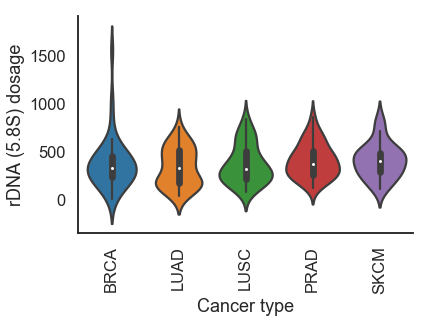

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov.58S.norm", data=data)
#g=sns.stripplot(x="disease", y="cov.58S.norm", data=data, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='rDNA (5.8S) dosage')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("5.8S.dosage.png", bbox_inches='tight')

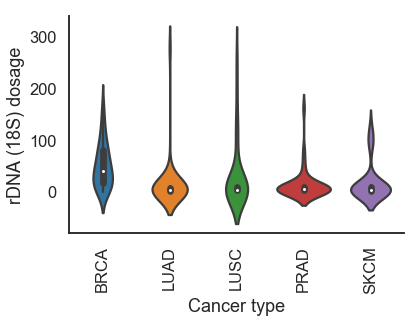

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov.18S.norm", data=data)
#g=sns.stripplot(x="disease", y="cov.18S.norm", data=data, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='rDNA (18S) dosage')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("18S.dosage.png", bbox_inches='tight')

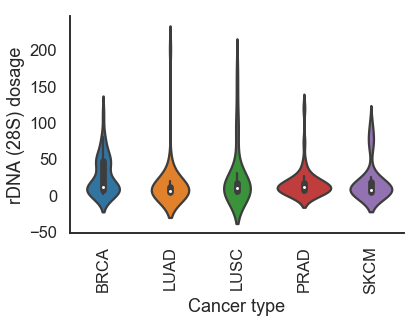

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov.28S.norm", data=data)
g.set(xlabel='Cancer type', ylabel='rDNA (28S) dosage')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("28S.dosage.png", bbox_inches='tight')

(-0.022953979390191104, 0.7545304253371072)

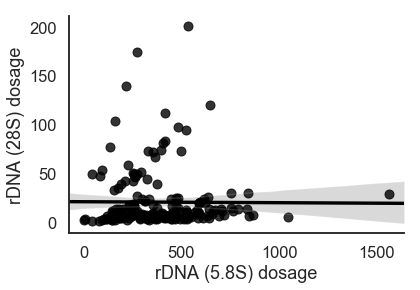

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov.58S.norm", y="cov.28S.norm", data=data,color="black")
g.set(xlabel='rDNA (5.8S) dosage', ylabel='rDNA (28S) dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("28S.vs.58S.png", bbox_inches='tight')

stats.pearsonr(data['cov.18S.norm'], data['cov.58S.norm'])

(0.9540977082486075, 2.4853044972211593e-99)

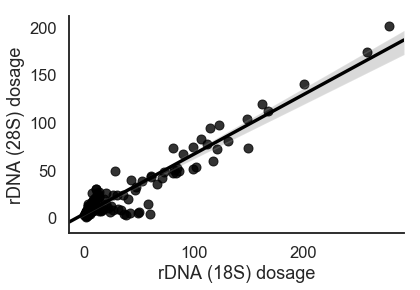

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov.18S.norm", y="cov.28S.norm", data=data,color="black")
g.set(xlabel='rDNA (18S) dosage', ylabel='rDNA (28S) dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("18S.vs.28S.png", bbox_inches='tight')

stats.pearsonr(data['cov.28S.norm'], data['cov.18S.norm'])

(0.9389738791367283, 3.897580874668863e-88)

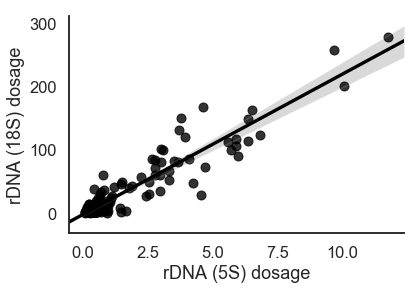

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov.5S.norm", y="cov.18S.norm", data=data,color="black")
g.set(xlabel='rDNA (5S) dosage', ylabel='rDNA (18S) dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("18S.vs.5S.png", bbox_inches='tight')

stats.pearsonr(data['cov.18S.norm'], data['cov.5S.norm'])

(0.9400798941418357, 7.492126963407139e-89)

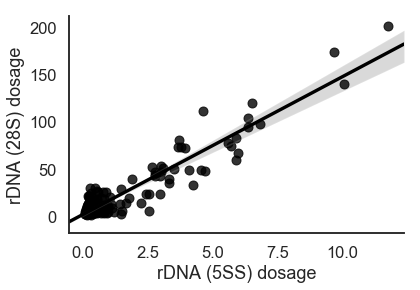

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov.5S.norm", y="cov.28S.norm", data=data,color="black")
g.set(xlabel='rDNA (5SS) dosage', ylabel='rDNA (28S) dosage')

g=sns.despine()
#plt.show(g)
plt.savefig("28S.vs.5S.png", bbox_inches='tight')

stats.pearsonr(data['cov.28S.norm'], data['cov.5S.norm'])

(-0.007060460369000751, 0.9233905576505903)

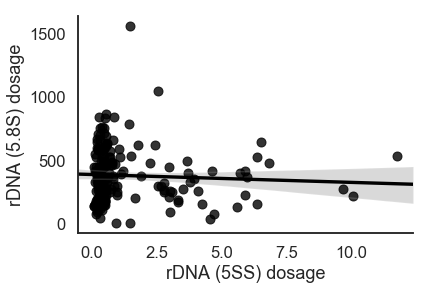

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov.5S.norm", y="cov.58S.norm", data=data,color="black")
g.set(xlabel='5S dosage', ylabel='5.8S dosage')
g.set(xlabel='rDNA (5SS) dosage', ylabel='rDNA (5.8S) dosage')

g=sns.despine()
#plt.show(g)
plt.savefig("28S.vs.58S.pdf", bbox_inches='tight')

stats.pearsonr(data['cov.28S.norm'], data['cov.58S.norm'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_58S_cov=pd.read_csv('58S.WXS.raw.csv.gz',compression='gzip')
#data_58S_cov=pd.read_csv('test2.txt')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_58S_cov=pd.merge(data_58S_cov, metadata, on='ID')
data_58S_cov.head()



,ID,pos,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,1,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,003860a34c9b244a5d8435b220ca5673,2,339,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
2,003860a34c9b244a5d8435b220ca5673,3,583,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
3,003860a34c9b244a5d8435b220ca5673,4,715,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
4,003860a34c9b244a5d8435b220ca5673,5,805,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN


AttributeError: 'NoneType' object has no attribute 'figure'

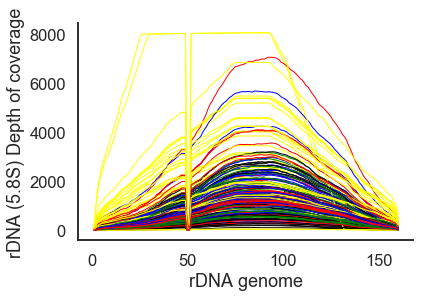

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.despine()


dfList = set(data_58S_cov['ID'].tolist())


for x in dfList:
    data_local=data_58S_cov[data_58S_cov['ID'] == x]
    #df = create_df_with(x)
    #plt.figure() #this creates a new figure on which your plot will appear
    d=data_local['disease'].tolist()[0]
    if d=='BRCA':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='yellow',linewidth=1)
    elif d=='LUSC':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='green',linewidth=1)
    elif d=='SKCM':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='red',linewidth=1)
    elif d=='PRAD':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='blue',linewidth=1)
    elif d=='LUAD':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='black',linewidth=1)


g.set_ylabel('Depth of coverage')  
g.set_xlabel('5.8S rDNA genome') 
g=sns.despine()
g.figure.savefig("5.8S.coverage.png", bbox_inches='tight')


    


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_18S_cov=pd.read_csv('18S.WXS.raw.csv.gz',compression='gzip')
#data_58S_cov=pd.read_csv('test2.txt')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_18S_cov=pd.merge(data_18S_cov, metadata, on='ID')
data_18S_cov.head()

,ID,pos,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,1,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,003860a34c9b244a5d8435b220ca5673,2,5,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
2,003860a34c9b244a5d8435b220ca5673,3,7,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
3,003860a34c9b244a5d8435b220ca5673,4,11,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
4,003860a34c9b244a5d8435b220ca5673,5,11,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

g=sns.set_style("white")
g=sns.set_context("talk")


dfList = set(data_18S_cov['ID'].tolist())


for x in dfList:
    data_local=data_18S_cov[data_18S_cov['ID'] == x]
    #df = create_df_with(x)
    #plt.figure() #this creates a new figure on which your plot will appear
    d=data_local['disease'].tolist()[0]
    if d=='BRCA':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='yellow',linewidth=1)
    elif d=='LUSC':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='green',linewidth=1)
    elif d=='SKCM':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='red',linewidth=1)
    elif d=='PRAD':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='blue',linewidth=1)
    elif d=='LUAD':
        sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='black',linewidth=1)
    
    
g.set_ylabel('Depth of coverage')  
g.set_xlabel('18S rDNA genome') 
g=sns.despine()

g.figure.savefig("18S.coverage.png", bbox_inches='tight')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_28S_cov=pd.read_csv('28S.WXS.raw.csv.gz',compression='gzip')
#data_58S_cov=pd.read_csv('test2.txt')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_28S_cov=pd.merge(data_28S_cov, metadata, on='ID')
data_28S_cov.head()

,ID,pos,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,1,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,003860a34c9b244a5d8435b220ca5673,2,37,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
2,003860a34c9b244a5d8435b220ca5673,3,45,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
3,003860a34c9b244a5d8435b220ca5673,4,57,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
4,003860a34c9b244a5d8435b220ca5673,5,62,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN


AttributeError: 'AxesSubplot' object has no attribute 'set_size_inches'

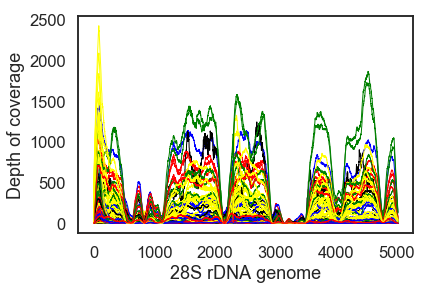

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

g=sns.set_style("white")
g=sns.set_context("talk")


dfList = set(data_28S_cov['ID'].tolist())


for x in dfList:
    data_local=data_28S_cov[data_28S_cov['ID'] == x]
    #df = create_df_with(x)
    #plt.figure() #this creates a new figure on which your plot will appear
    d=data_local['disease'].tolist()[0]
    if d=='BRCA':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='yellow',linewidth=1)
    elif d=='LUSC':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='green',linewidth=1)
    elif d=='SKCM':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='red',linewidth=1)
    elif d=='PRAD':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='blue',linewidth=1)
    elif d=='LUAD':
        sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='black',linewidth=1)
    
    
g.set_ylabel('Depth of coverage')  
g.set_xlabel('28S rDNA genome') 
g.savefig("28S.coverage.png")

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_5S_cov=pd.read_csv('5S.WXS.raw.csv.gz',compression='gzip')
#data_58S_cov=pd.read_csv('test2.txt')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_5S_cov=pd.merge(data_5S_cov, metadata, on='ID')
data_5S_cov.head()

,ID,pos,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,1,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,003860a34c9b244a5d8435b220ca5673,2,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
2,003860a34c9b244a5d8435b220ca5673,3,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
3,003860a34c9b244a5d8435b220ca5673,4,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
4,003860a34c9b244a5d8435b220ca5673,5,0,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN


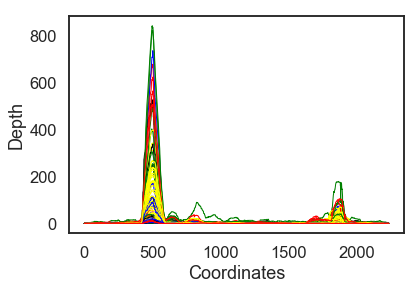

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

g=sns.set_style("white")
g=sns.set_context("talk")


dfList = set(data_5S_cov['ID'].tolist())


for x in dfList:
    data_local=data_5S_cov[data_5S_cov['ID'] == x]
    #df = create_df_with(x)
    #plt.figure() #this creates a new figure on which your plot will appear
    d=data_local['disease'].tolist()[0]
    if d=='BRCA':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='yellow',linewidth=1)
    elif d=='LUSC':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='green',linewidth=1)
    elif d=='SKCM':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='red',linewidth=1)
    elif d=='PRAD':
        g=sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='blue',linewidth=1)
    elif d=='LUAD':
        sns.lineplot(x="pos",y="cov",legend=False,data=data_local,color='black',linewidth=1)
    
    
g.set_ylabel('Depth')  
g.set_xlabel('Coordinates') 
g.figure.savefig("5S.coverage.pdf", bbox_inches='tight')